<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">REGRESSION MASTER NOTEBOOK</h1></center>


Hey! In this notebook, I have covered regression techniques in detail. I explained the theoretical information about regression techniques, evaluation metrics and bias-variance tradeoff, which is one of the important issues of regression. I tried to explain each technique with different datasets. Three different datasets are used in this notebook:

1. House Sales in King County, USA
1. Ice Cream Revenue
1. Manufacturing cost

### In each main topic, I used the same template:

1. Information About Dataset
1. Data Visualization
1. Train-Test Split
1. Model
1. Evaluation of Model

In addition, in the Linear Regression section, I gave theoretical information about the metrics used in the evaluation of regression models, as well as coding.

### The main topics are:

1. [Simple Linear Regression](#1)
   1. [Evaluation Metrics](#5)
1. [Multiple Linear Regression](#2)
1. [Polynomial Regression](#3)
1. [Bias-Variance Tradeoff](#4)
   1. [Ridge Regression](#6)
   1. [Lasso Regression](#7)
   1. [Elastic Net](#8)
   
### Before starting:
* Main headings are indicated with a black background.
* The following color palettes are used for each main title.

In [ ]:
import seaborn as sns
headers = ['#000000']
print("Headers Color:")
sns.palplot(sns.color_palette(headers))
print()

In [ ]:
l_r = ['#3d5a80', '#98c1d9', '#e0fbfc', '#ee6c4d', '#293241']
print("Linear Regression Colors:")
sns.palplot(sns.color_palette(l_r))
print()

In [ ]:
m_l_r = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad']
print("Multiple Linear Regression Colors:")
sns.palplot(sns.color_palette(m_l_r))
print()


In [ ]:
p_r = ['#590d22', '#800f2f', '#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3']
print("Polynomial Regression Colors:")
sns.palplot(sns.color_palette(p_r))
print()

In [ ]:
b_v_t = ['#582f0e', '#7f4f24', '#936639', '#a68a64', '#b6ad90', '#c2c5aa', '#a4ac86', '#656d4a', '#414833', '#333d29']
print("Bias-Variance Tradeoff Colors:")
sns.palplot(sns.color_palette(b_v_t))
print()

## Let's Start!

<a id = "1"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Simple Linear Regression</h1></center>

## What is linear regression?
Linear regression analysis is used to estimate the value of one variable relative to the value of another variable. The variable you want to predict is called the dependent variable. The variable you use to predict the value of the other variable is called the independent variable.

## Why is linear regression important?

Linear regression models are relatively simple and provide an easy-to-interpret mathematical formula that can produce predictions. Linear regression can be applied to a variety of fields in business and academic studies.

You can see linear regression used in everything from the biological, behavioral, environmental and social sciences to business. Linear regression models have become a scientifically proven method and they reliably predict the future. Because linear regression is a well-established statistical procedure, the properties of linear regression models can be well understood and trained very quickly.

## Simple Linear Regression Model

The simple linear regression model is a method used to estimate the dependent variable with the help of the independent variable when there is a linear relationship between the independent variable and the dependent variable.

\begin{equation}
Y=\beta_{0}+\beta_{1} X+\epsilon
\end{equation}

<SCRIPT SRC='https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML'></SCRIPT>
<SCRIPT>MathJax.Hub.Config({ tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}})</SCRIPT>

We can construct a linear model with the above equation. In this model, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>0</mn>
    </mrow>
  </msub>
</math> is the cutoff point, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>1</mn>
    </mrow>
  </msub>
</math> is the slope of the line, and ϵ is the error term.





In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<center><h1 style = "background:#3d5a80 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [ ]:
df = pd.read_csv('/kaggle/input/ice-cream-revenue/IceCreamData.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

<center><h1 style = "background:#98c1d9 ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

In [ ]:
plt.figure(dpi = (200))
sns.pairplot(df)

In [ ]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Revenue'], y = df['Temperature'], kind='reg', line_kws={"color": "red"})

In [ ]:
plt.figure(figsize = (10,5), dpi = (100))
sns.scatterplot(x = df['Revenue'], y = df['Temperature'], marker="*")

<center><h1 style = "background:#e0fbfc ;color:black;border:0;font-weight:bold">Train-Test Split</h1></center>

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Temperature']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

<center><h1 style = "background:#ee6c4d ;color:white;border:0;font-weight:bold">Linear Regression</h1></center>

**fit_intercept** : bool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**normalize** : bool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

**copy_X** : bool, default=True
If True, X will be copied; else, it may be overwritten.

**n_jobs** : int, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

**positive** : bool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

**METHOD** : *fit(X, y[, sample_weight])* --> It fits linear model.

**X** : {array-like, sparse matrix} of shape (n_samples, n_features)

Training data.

**y** :array-like of shape (n_samples,) or (n_samples, n_targets)

Target values. Will be cast to X’s dtype if necessary

**sample_weight** : array-like of shape (n_samples,), default=None

Individual weights for each sample

**returns** : **self** : returns an instance of self.

In [ ]:
model.fit(X_train, y_train)

**METHOD** : *predict(X, y[, sample_weight])* --> Predicts test values using the linear model.

**X** : array-like or sparse matrix, shape (n_samples, n_features)

Test samples.

**returns** : **C** --> array, shape (n_samples,)

It returns predicted values.

In [ ]:
pred = model.predict(X_test)

**METHOD** : *score(X, y[, sample_weight])* --> Return the coefficient of determination <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
</math> of the prediction.

**X** : array-like of shape (n_samples, n_features)

Test samples. For some estimators this may be a precomputed kernel matrix or a list of generic objects instead with shape (n_samples, n_samples_fitted), where n_samples_fitted is the number of samples used in the fitting for the estimator.

**y** : array-like of shape (n_samples,) or (n_samples, n_outputs)

True values for X.

**returns** : **score** --> float

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
</math> of self.predict(X) wrt. y.

In [ ]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

**NOTE:** All the method explanations were taken from scikit-learn documentation. 

*Source for explanations of parameters* : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<a id = "5"></a>
<center><h1 style = "background:#293241 ;color:white;border:0;font-weight:bold">Evaluation of Model</h1></center>

## Mean Squared Error

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the average loss of frames per sample across the entire dataset. To calculate the MSE, sum all frame losses for individual samples and then divide by the number of samples.

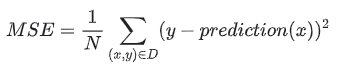

* x is the property the model uses to predict.
* The prediction (x) meaning is the predicted value according to the x property.
* y is the true value.
* N is the number of samples.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, pred))

## Root Mean Squared Error

It is a quadratic metric that measures the magnitude of the error, often used to find the distance between the predictor's predicted values and the actual values of a machine learning model. The standard deviation of the RMSE estimation errors (residues). That is, the residuals are a measure of how far the regression line is from the data points; RMSE is a measure of how far these residues spread. In other words, it tells you how dense that data is around the line that best fits the data. The RMSE value can range from 0 to infinity. Negative oriented scores, i.e. predictors with lower values, perform better. A zero RMSE value means the model made no mistakes. RMSE has the advantage of punishing large errors more so it may be better suited to some situations. RMSE prevents the unwanted use of absolute values in many mathematical calculations.

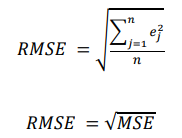

In [ ]:
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

## Mean Absolute Error

Absolute error is the difference between estimated values and actual values. To be exact, it is the mean of the absolute value of each difference between the actual value and the predicted value for that sample across the entire sample of the data set.



* y is the true value.
* y^ is the predicted value.

*A lower value indicates better accuracy.*

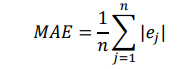

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))

## Mean Absolute Percentage Error

In regression and time series models, mean absolute percent error is frequently used to measure the accuracy of predictions. If there are zero among the real values, the MAPE cannot be calculated as there will be division by zero. Percentage error cannot exceed 100% for very low predictive values, but there is no upper limit for the percentage error for very high predictive values. When MAPE is used to compare the accuracy of estimators, it is biased as it systematically selects a method that is too low for estimates. This small but serious problem can be overcome with an accuracy criterion that finds the ratio of predicted values to their true values. This approach leads to estimates that can be interpreted in terms of the geometric mean.

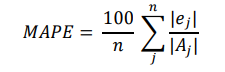

In [ ]:
import sklearn.metrics as m
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-pred) / y_test))*100)

## R square

R² is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination or the multiple coefficient of determination for multiple regression. To put it in simpler language, R-square is a measure of fit for linear regression models.



R-squared does not indicate whether a regression model fits your data adequately. A good model can have a low R-squared value. On the other hand, a biased model can have a high R-squared value!

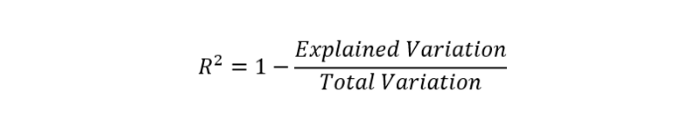

In [ ]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, pred))

## Adjusted R Squared

Each additional argument added to a model always increases the R² value.

As the independent variable is added, the model becomes more complex, when the model becomes complex, "overfitting" occurs. Hence R-squared increases.

Adjusted R-square comes into play to solve such problems. The adjusted R-square compensates for each independent variable and only increases when each given variable improves the model above what is possible.

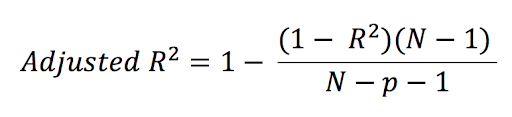

In [ ]:
import sklearn.metrics as m
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = m.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

## Let's put it all together

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [ ]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

<a id = "2"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Multiple Linear Regression</h1></center>

It is an analysis to reveal the relationship between a dependent variable and a series of independent variables associated with it.

Multiple linear regression examines the linear relationship between two or more independent variables and one dependent variable. There is a correlation between dependent and independent variables in multiple regression. Let's denote the independent variables as X and the dependent variables as Y.

$$ {Y = XB + E}.$$

* Y: dependent variable observation vector
* X: independent variables observation matrix
* B: coefficients vector
* E: random error vector

<SCRIPT SRC='https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML'></SCRIPT>
<SCRIPT>MathJax.Hub.Config({ tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}})</SCRIPT>

$$ Simple Linear Regression --> {y =  b_0  + b_1 x_1}.$$

$$ Multiple Linear Regression --> {y =  b_0  + b_1 x_1  + b_2 x_2+⋯+ b_n x_n}.$$


In multiple linear regression, the degree of effect of each independent variable on the dependent variable is different from each other. Therefore, the coefficient of each variable need not be the same in addition to the equation in simple linear regression.

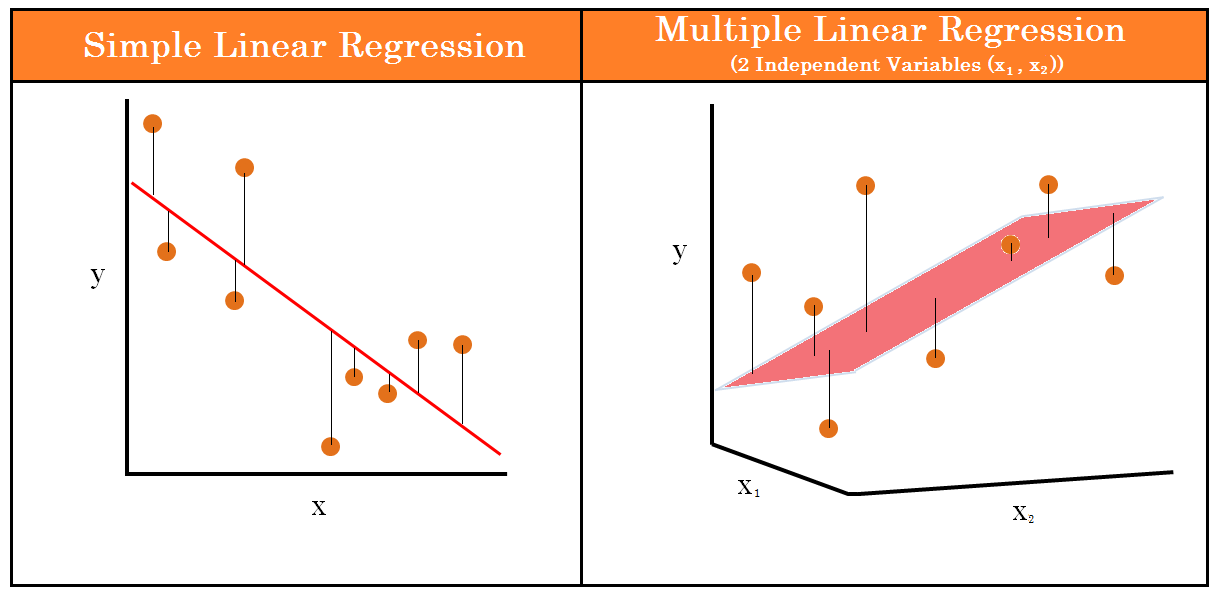

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<center><h1 style = "background:#d9ed92 ;color:black;border:0;font-weight:bold">Information About Dataset</h1></center>

In [ ]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.drop('id', axis = 1, inplace = True)

<center><h1 style = "background:#b5e48c ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

In [ ]:
df_v = df
df_v.columns

In [ ]:
df_v.drop(['date','zipcode', 'lat', 'long'], axis = 1, inplace = True)

In [ ]:
sns.pairplot(data = df_v)

In [ ]:
sns.jointplot(x='sqft_living', y='price', data = df_v, color = 'gray')

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Correlation</h1></center>

In [ ]:
plt.figure(figsize=(24,16)) 
sns.heatmap(df_v.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Train-Test Split</h1></center>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"],axis =1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Multiple Linear Regression</h1></center>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True, normalize = True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

In [ ]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

In [ ]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<center><h1 style = "background:#76c893 ;color:black;border:0;font-weight:bold">Evaluation of Model</h1></center>

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

<a id = "3"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Polynomial Regression</h1></center>

The hypothesis function is not necessarily linear if it does not fit the data well.

The behavior or curve of the hypothesis function can be changed to a quadratic, cubic, or square root function (or any other form).

Sometimes, there may be a non-linear relationship between the data. One way to try to explain such a relationship is with a polynomial regression model. Such a model for a single predicted X:



Here h is called the degree of polynomial. For lower orders, the relationship has a specific name (i.e. h = 2 is called quadratic, h = 3 is called cubic, h = 4 is called quartic, etc.). Although this model enables a nonlinear relationship between Y and X, polynomial regression is still considered linear regression as the regression coefficients β1, β2, …, βh are linear.

To calculate the above equation, we will only need the response variable (Y) and the predictor variable (X). However, polynomial regression models may also have other predictive variables that can lead to the interaction term. As can be seen, the basic equation for a polynomial regression model above is a relatively simple model, but depending on the situation, the model can grow much larger.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<center><h1 style = "background:#590d22 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [ ]:
df = pd.read_csv('/kaggle/input/manufacturing-cost/EconomiesOfScale.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

<center><h1 style = "background:#800f2f ;color:white;border:0;font-weight:bold">Data Visualization</h1></center>

In [ ]:
sns.set_theme(style="white")
plt.figure(dpi = (200))
sns.pairplot(df)

In [ ]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data = df)

In [ ]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Number of Units'], y = df['Manufacturing Cost'], kind='reg', line_kws={"color": "red"})

In [ ]:
plt.figure(figsize = (5,5), dpi = (100))
sns.scatterplot(x = df['Number of Units'], y = df['Manufacturing Cost'], marker="*")

<center><h1 style = "background:#a4133c ;color:white;border:0;font-weight:bold">Train-Test Split</h1></center>

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Number of Units']]
y = df['Manufacturing Cost']

# We are using entire dataset for training
X_train = X
y_train = y

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)

<center><h1 style = "background:#c9184a ;color:white;border:0;font-weight:bold">Polynomial Regression</h1></center>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=6)

In [ ]:
X_columns = poly_regressor.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_columns, y_train)

pred = model.predict(poly_regressor.fit_transform(X_train))

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, pred, color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

<center><h1 style = "background:#ff4d6d ;color:white;border:0;font-weight:bold">Optimal Degree</h1></center>

In [ ]:
j = 0
plt.figure(figsize=(150,150))

for i in range(1,11):
    poly_regressor = PolynomialFeatures(degree=i)
    X_columns = poly_regressor.fit_transform(X_train)
    
    model = LinearRegression()

    model.fit(X_columns, y_train)

    pred = model.predict(poly_regressor.fit_transform(X_train))
  
    plt.subplot(5,2,j+1)
    plt.scatter(X_train, y_train, color = 'red', s = 115)
    plt.plot(X_train, pred, color = 'blue',linewidth = 5.5)
    plt.ylabel('Cost Per Unit Sold [dollars]')
    plt.xlabel('Number of Units [in Millions]')
    plt.title(f'Unit Cost vs. Number of Units [in Millions](Training dataset) - Degree =  {i}',color = 'black',fontsize = 75)
    j += 1

<a id = "4"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">BIAS - VARIANCE TRADEOFF</h1></center>

**Bias** is the difference between the models mean estimate and the true value. If the model has high bias, it oversimplifies the training data. This causes a high error rate in training and test data.

**Variance,** on the other hand, is a value that tells the model prediction variability or spread of data for a given data point. If the model has high variance, instead of finding a pattern that can generalize in the train set, it cannot generalize well to data it has never seen before, since it starts to learn or even memorize the observations in this set. This results in low error in the training data but high error in the test data.

In machine learning, models are fitted to the data, and the loss function is tried to be minimized. If the loss function is very close to 0, the model has a probability of over-fitting, and if it is far from 0, there is a probability of under-fitting. To explain a little more, this is why the loss function is seriously small since the estimated value will be very close to the true value, as the model starts to learn the observations instead of discovering the pattern in the data.

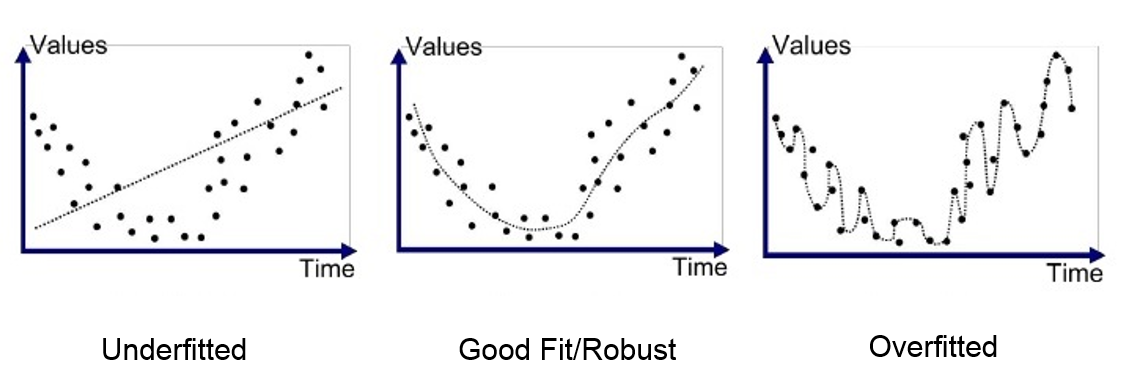

*Soruce for picture:* https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76


* **High Bias Low Variance:** Models are consistent but average error rate is high.

* **High Bias High Variance:** Models are both inaccurate and inconsistent.

* **Low Bias Low Variance:** Models are accurate and consistent on average. We strive to achieve this result in our models.

* **Low Bias High Variance:** Models are somewhat accurate but inconsistent on average. When a small change is made in the data set, it causes a large error rate.

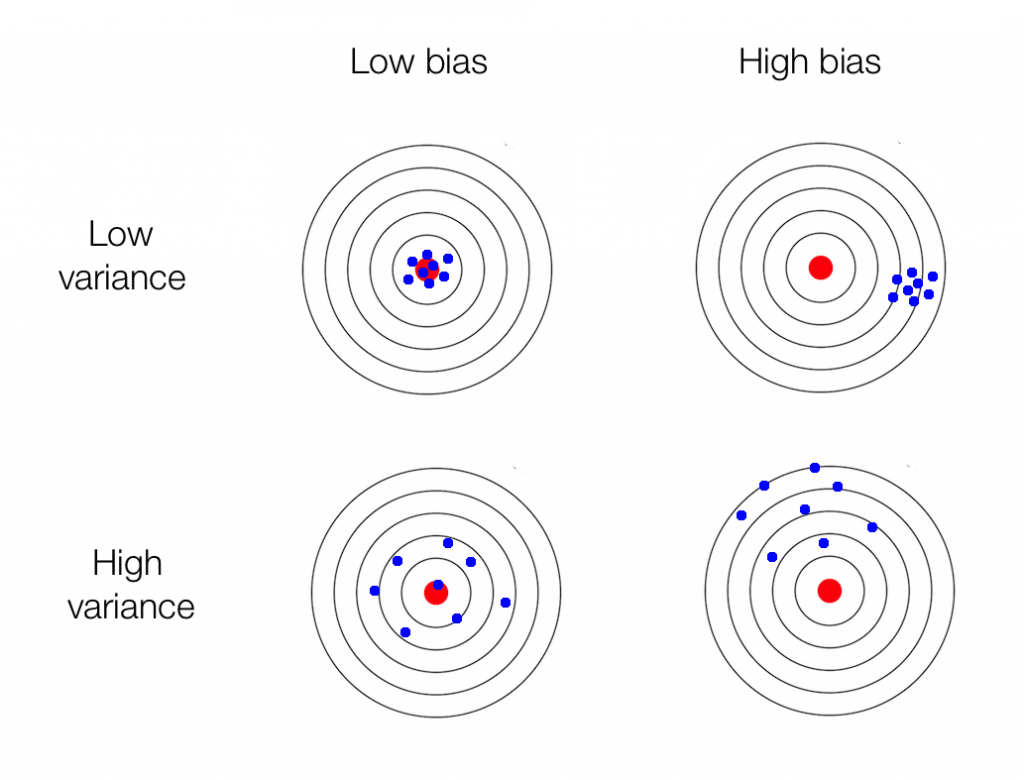

*Soruce for picture:* https://ahmetkuzubasli.medium.com/modeliniz-neden-hala-hatal%C4%B1-bias-ve-variance-6368f36de751

## What is the way to find out if we have high bias or high variance?

#### If the model has high bias, the following results can be encountered;
* The error rate of the training set of the model is high.
* The error rate of the test data set is similar to the training set.

#### If the model has high variance, the following results can be encountered;
* The error rate of the training set of the model is low.
* The error rate of the test data set of the model is high.


## How to avoid overfitting?
If the model has started to memorize the data set used for training more than necessary, or if the training set is monotonous, the risk of overfitting is high. When we give the test data to this model, which has a high score in the training set, we will probably get a very low score. Because the model memorized the situations in the training set and searches for these situations in the test data set. Very bad prediction scores will be obtained in the test data set, since there will be no memorized cases in the slightest change. Models with overfitting problems have high variance and low bias.

This usually happens when the model is very complex (i.e. too many features/variables compared to the number of observations). This model will have very high prediction accuracy on training data, but probably not very accurate on untrained or new data. This problem stems from the model's inability to generalize. Such models learn or explain the "noise" in the training data rather than the actual relationships between the variables in the data.

The overfitting problem can be solved by applying the following methods;

* **Adding more data:** If the training set is uniform, data diversity should be increased by adding more data.
* **Ensembling:** It is a machine learning method that allows to use separate models together. Thus, the model can work with more complex structured data without overfit.
* **Reducing the number of features:** Columns that are highly correlated with each other can be deleted or a single variable can be created from these variables by methods such as factor analysis.
* **Cross Validation:** An important technique in Machine Learning applied to predict model accuracy on unseen data. It does the training by dividing the data set into k pieces, it uses 1 piece from these k pieces for testing, this piece is different from the previous iteration each time, so the model is constantly tested with a new test set.
* **Regularization:** Regularization is a technique used to reduce the complexity of the model. It does this by penalizing the loss function. In other words, it reduces the effect of these variables by reducing the weight of the variables with high weight in the model. This method helps to solve the over-learning problem. The loss function is the sum of the squares of the difference between the actual value and the predicted value. To reduce the weight of the variables, it is necessary to increase the regularization value. **Lasso** and **Ridge** Regularization methods are techniques used for this purpose.


## How to avoid underfitting?
Unlike overfitting, if a model has underfitting, it means that the model does not fit the training data and therefore misses trends in the data. It also means that the model cannot be generalized for new data. This problem is often the result of a very simple model.
Models with underfitting problems have a high error rate in both training and test data sets. It has low variance and high bias. Instead of following the training data too closely, these models ignore the lessons learned from the training data and fail to learn the fundamental relationship between inputs and outputs.

* **Simple model structure:** The constructed model is so simple that it cannot fully learn the relationship between input and output data. The high train error shows that the machine learning model is very simple.

* **Missing data:** Another reason for underfitting can be a lack of data. For example, when the results depend on more than one variable, training performance will be low if one tries to learn through only one variable.

* **Insufficient data:** The amount of data must be sufficient if models are expected to yield high success rates. If there is not enough data, the model will have trouble finding a pattern between the input data and the results.

* **Noisy data:** If the data is too noisy, machine learning techniques will have learning difficulties and will not be able to generalize. Noisy data should be reduced so that the model does not think that the data is randomly generated.

<center><h1 style = "background:#582f0e ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [ ]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

<center><h1 style = "background:#7f4f24 ;color:white;border:0;font-weight:bold">Data Visualization</h1></center>

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<center><h1 style = "background:#936639 ;color:white;border:0;font-weight:bold">Train-Test Split</h1></center>

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

<a id = "6"></a>
<center><h1 style = "background:#a68a64 ;color:white;border:0;font-weight:bold">Ridge Regression (L2 Regularization)</h1></center>

* It is used to analyze multivariate regression data. 
* The aim is to find the coefficients that minimize the sum of squares error by applying a penalty to these coefficients. 
* It is resistant to over-fitting. 
* It offers a solution to multidimensionality. 
* It establishes a model with all variables, does not remove irrelevant variables, only brings their coefficients closer to zero.
* It is necessary to find a good value for alpha (penalty) when building the model.


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

In [ ]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

In [ ]:
plt.plot(y_test, pred, "o", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

<a id = "7"></a>
<center><h1 style = "background:#b6ad90 ;color:white;border:0;font-weight:bold">Lasso Regression (L1 Regularization)</h1></center>

* It performs both variable selection and regularization in order to increase the prediction accuracy and interpretability of the model it produces. 
* Just like in ridge regression, the aim is to find the coefficients that minimize the sum of squares error by applying penalties to the coefficients. But unlike ridge regression, it sets the coefficients of irrelevant variables equal to zero.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

In [ ]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

<a id = "8"></a>
<center><h1 style = "background:#c2c5aa ;color:white;border:0;font-weight:bold">Elastic Net</h1></center>

The goal is the same as ridge and lasso regression, but elastic net combines ridge and lasso regression. Ridge regression style penalization and lasso regression style variable selection.

In [ ]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
e_net.fit(X_train, y_train)

pred = e_net.predict(X_test)

train_score = e_net.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = e_net.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

In [ ]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

# Conclusion

We have come to the end of the notebook. I covered basic regression techniques and problems in this notebook. I hope you liked it.

* If you have questions, please comment them. I will try to explain if you don't understand.
* Waiting for your positive and negative comments. :)

Thank you for your time.
